### Import

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import sys
import os

module_dir = "/storage/home/hcoda1/2/cmarutha3/clef/animalclef-2025/"
if module_dir not in sys.path:
    sys.path.append(module_dir)

In [36]:
import torch
import torch.nn
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from transformers import AutoImageProcessor, AutoModel
from PIL import Image
import matplotlib.pyplot as plt
import umap

le1 = LabelEncoder()
le2 = LabelEncoder()
print(torch.cuda.is_available())
print(torch.__version__)

False
2.6.0+cu124


CPU or CUDA

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device(type='cpu')

In [38]:
os.getcwd()

'/storage/scratch1/2/cmarutha3'

In [39]:
cwd = os.getcwd()
print("Current Working Directory:", cwd)
os.chdir(os.path.expanduser("~/scratch/"))
print("Changed Working Directory to:", os.getcwd())

Current Working Directory: /storage/scratch1/2/cmarutha3
Changed Working Directory to: /storage/scratch1/2/cmarutha3


In [ ]:
file_list = []
for root, dirs, files in os.walk("happy-whale-and-dolphin/train_images/"):
    for file in files:
        file_list.append(file)

51033

### Extract Data

In [41]:
train_df = pd.read_csv("happy-whale-and-dolphin/train.csv")

In [42]:
train_df.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


In [43]:
# Find unique values in the 'id' column
unique_ids = train_df["individual_id"].unique()
print("Unique IDs:", unique_ids)

# Count unique values in the 'id' column
count_unique_ids = train_df["individual_id"].value_counts()
print("Count of Unique IDs:\n", count_unique_ids)

Unique IDs: ['cadddb1636b9' '1a71fbb72250' '60008f293a2b' ... '3509cb6a8504'
 'e880e47c06a4' 'bc6fcab946c4']
Count of Unique IDs:
 individual_id
37c7aba965a5    400
114207cab555    168
a6e325d8e924    155
19fbb960f07d    154
c995c043c353    153
               ... 
df7668d8f754      1
03be3cdbff9c      1
8235d066b9fe      1
d1b416bae01d      1
f727bd52d5dc      1
Name: count, Length: 15587, dtype: int64


In [44]:
# Find unique values in the 'id' column
unique_ids = train_df["species"].unique()
print("Unique IDs:", unique_ids)

# Count unique values in the 'id' column
count_unique_ids = train_df["species"].value_counts()
print("Count of Unique IDs:\n", count_unique_ids)

Unique IDs: ['melon_headed_whale' 'humpback_whale' 'false_killer_whale'
 'bottlenose_dolphin' 'beluga' 'minke_whale' 'fin_whale' 'blue_whale'
 'gray_whale' 'southern_right_whale' 'common_dolphin' 'kiler_whale'
 'pilot_whale' 'dusky_dolphin' 'killer_whale' 'long_finned_pilot_whale'
 'sei_whale' 'spinner_dolphin' 'bottlenose_dolpin' 'cuviers_beaked_whale'
 'spotted_dolphin' 'globis' 'brydes_whale' 'commersons_dolphin'
 'white_sided_dolphin' 'short_finned_pilot_whale' 'rough_toothed_dolphin'
 'pantropic_spotted_dolphin' 'pygmy_killer_whale' 'frasiers_dolphin']
Count of Unique IDs:
 species
bottlenose_dolphin           9664
beluga                       7443
humpback_whale               7392
blue_whale                   4830
false_killer_whale           3326
dusky_dolphin                3139
spinner_dolphin              1700
melon_headed_whale           1689
minke_whale                  1608
killer_whale                 1493
fin_whale                    1324
gray_whale                   112

In [45]:
ids = ["a6e325d8e924", "19fbb960f07d", "37c7aba965a5", "114207cab555"]
species = ["bottlenose_dolphin", "blue_whale", "killer_whale", "beluga"]
# Train Data 1
train_df1 = train_df.reset_index(drop=True)
train_df1["individual_id"] = le1.fit_transform(train_df1["individual_id"])
n_labels1 = train_df1["individual_id"].nunique()
# Train Data 2
train_df2 = train_df.reset_index(drop=True)
train_df2["species"] = le2.fit_transform(train_df2["species"])
n_labels2 = train_df2["species"].nunique()

In [46]:
train_df1.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,12348
1,000562241d384d.jpg,humpback_whale,1636
2,0007c33415ce37.jpg,false_killer_whale,5842
3,0007d9bca26a99.jpg,bottlenose_dolphin,4551
4,00087baf5cef7a.jpg,humpback_whale,8721


In [47]:
train_df2.head()

,image,species,individual_id
0,00021adfb725ed.jpg,18,cadddb1636b9
1,000562241d384d.jpg,14,1a71fbb72250
2,0007c33415ce37.jpg,9,60008f293a2b
3,0007d9bca26a99.jpg,2,4b00fe572063
4,00087baf5cef7a.jpg,14,8e5253662392


In [48]:
# Find unique values in the 'id' column
unique_ids = train_df1["individual_id"].unique()
print("Unique IDs:", unique_ids)

# Count unique values in the 'id' column
count_unique_ids = train_df1["individual_id"].value_counts()
print("Count of Unique IDs:\n", count_unique_ids)

Unique IDs: [12348  1636  5842 ...  3211 14182 11508]
Count of Unique IDs:
 individual_id
3398     400
1082     168
10192    155
1613     154
12267    153
        ... 
13612      1
245        1
7982       1
12783      1
15053      1
Name: count, Length: 15587, dtype: int64


In [49]:
# Find unique values in the 'id' column
unique_ids = train_df2["species"].unique()
print("Unique Species:", unique_ids)

# Count unique values in the 'id' column
count_unique_ids = train_df2["species"].value_counts()
print("Count of Unique Species:\n", count_unique_ids)

Unique Species: [18 14  9  2  0 19 10  1 13 26  6 15 21  8 16 17 24 27  3  7 28 12  4  5
 29 25 23 20 22 11]
Count of Unique Species:
 species
2     9664
0     7443
14    7392
1     4830
9     3326
8     3139
27    1700
18    1689
19    1608
16    1493
10    1324
13    1123
3     1117
15     962
26     866
28     490
24     428
25     367
6      347
7      341
21     262
17     238
29     229
4      154
20     145
12     116
5       90
22      76
23      60
11      14
Name: count, dtype: int64


### Preprocessing and Model

In [50]:
model_name = "facebook/dinov2-base"
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.to(device)

Dinov2Model(
  (embeddings): Dinov2Embeddings(
    (patch_embeddings): Dinov2PatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): Dinov2Encoder(
    (layer): ModuleList(
      (0-11): 12 x Dinov2Layer(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attention): Dinov2SdpaAttention(
          (attention): Dinov2SdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): Dinov2SelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (layer_scale1): Dinov2LayerScale()
        (drop_pa

### Dataset

In [51]:
class ExtractDataset1(Dataset):
    def __init__(self, X, y, preprocessor, model, transform=None):
        self.X = X
        self.y = y
        self.preprocessor = preprocessor
        self.transform = transform
        self.model = model

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        item_image = self.X.loc[idx, "image"]
        item_label = self.y.loc[idx, "individual_id"]
        item_image_path = os.path.join(
            "happy-whale-and-dolphin/train_images", item_image
        )
        item_image = Image.open(item_image_path).convert("RGB")
        #         print(item_image.size)

        inputs = self.preprocessor(images=item_image, return_tensors="pt")
        #         print(inputs['pixel_values'].shape)

        with torch.no_grad():
            outputs = self.model(**inputs)
        #             print(outputs.last_hidden_state.shape)
        cls_token = outputs.last_hidden_state[:, 0, :].squeeze(0).numpy()
        return cls_token, item_label


class ExtractDataset2(Dataset):
    def __init__(self, X, y, preprocessor, model, transform=None):
        self.X = X
        self.y = y
        self.preprocessor = preprocessor
        self.transform = transform
        self.model = model

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        item_image = self.X.loc[idx, "image"]
        item_label = self.y.loc[idx, "species"]
        item_image_path = os.path.join(
            "happy-whale-and-dolphin/train_images", item_image
        )
        item_image = Image.open(item_image_path).convert("RGB")
        #         print(item_image.size)

        inputs = self.preprocessor(images=item_image, return_tensors="pt")
        #         print(inputs['pixel_values'].shape)

        with torch.no_grad():
            outputs = self.model(**inputs)
        #             print(outputs.last_hidden_state.shape)
        cls_token = outputs.last_hidden_state[:, 0, :].squeeze(0).numpy()
        return cls_token, item_label


# def extract_cls_embeddings(data_loader):
#     cls_embeddings_list = []

#     for batch in data_loader:
#         print(f"Batch: {batch}")
#         inputs = processor(batch['pixel_values'], return_tensors='pt')

#         with torch.no_grad():
#             outputs = model(**inputs)

#         cls_embeddings = outputs.last_hidden_state[:, 0, :]
#         cls_embeddings_list.append(cls_embeddings)
#         break

#     return torch.cat(cls_embeddings_list, dim=0)

In [52]:
X1 = train_df1[["image", "species"]]
y1 = train_df1["individual_id"]
X2 = train_df2[["image", "individual_id"]]
y2 = train_df2["species"]

# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)
X_train1 = X1
y_train1 = y1
X_train2 = X2
y_train2 = y2

In [53]:
train_dataset1 = ExtractDataset1(
    X_train1.reset_index(), y_train1.reset_index(), processor, model
)
# valid_dataset1 = ExtractDataset1(X_test1.reset_index(), y_test1.reset_index(), processor, model)
train_loader1 = DataLoader(train_dataset1, batch_size=10, shuffle=True)
# validation_loader1 = DataLoader(valid_dataset1, batch_size=1, shuffle=True)

In [54]:
train_dataset2 = ExtractDataset2(
    X_train2.reset_index(), y_train2.reset_index(), processor, model
)
# valid_dataset2= ExtractDataset2(X_test2.reset_index(), y_test2.reset_index(), processor, model)
train_loader2 = DataLoader(train_dataset2, batch_size=10, shuffle=True)
# validation_loader2 = DataLoader(valid_dataset2, batch_size=1, shuffle=True)

### Extract CLS Embeddings

In [55]:
cls_tokens = []
labels = []
i = 0
for batch in train_loader1:
    cls_token, label = batch
    cls_token = cls_token.view(cls_token.size(0), -1)
    cls_tokens.append(cls_token)
    labels.append(label)
cls_tokens = torch.cat(cls_tokens, dim=0)
train_cls_embeddings1 = pd.DataFrame(cls_tokens.numpy())
train_cls_embeddings1["label"] = torch.cat(labels, dim=0).numpy()

In [56]:
cls_tokens = []
labels = []
for batch in train_loader2:
    cls_token, label = batch
    cls_token = cls_token.view(cls_token.size(0), -1)
    cls_tokens.append(cls_token)
    labels.append(label)
cls_tokens = torch.cat(cls_tokens, dim=0)
train_cls_embeddings2 = pd.DataFrame(cls_tokens.numpy())
train_cls_embeddings2["label"] = torch.cat(labels, dim=0).numpy()

In [57]:
train_cls_embeddings1.to_parquet("all_train_cls_embeddings1.parquet", engine="pyarrow")
train_cls_embeddings2.to_parquet("all_train_cls_embeddings2.parquet", engine="pyarrow")

/storage/scratch1/2/cmarutha3/.venv/lib64/python3.9/site-packages/pandas/io/parquet.py:190: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)


In [58]:
train_cls_embeddings1 = pd.read_parquet(
    "all_train_cls_embeddings1.parquet", engine="pyarrow"
)
train_cls_embeddings2 = pd.read_parquet(
    "all_train_cls_embeddings2.parquet", engine="pyarrow"
)

/storage/scratch1/2/cmarutha3/.venv/lib64/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/tmp/ipykernel_3160735/2594750296.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding[indices, 0], umap_embedding[indices, 1], color=color_map[label], label=le1.inverse_transform([label])[0], cmap='Spectral', s=5, alpha=0.6)
/tmp/ipykernel_3160735/2594750296.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding[indices, 0], umap_embedding[indices, 1], color=color_map[label], label=le1.inverse_transform([label])[0], cmap='Spectral', s=5, alpha=0.6)
/tmp/ipykernel_3160735/2594750296.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding[indices, 0], umap_emb

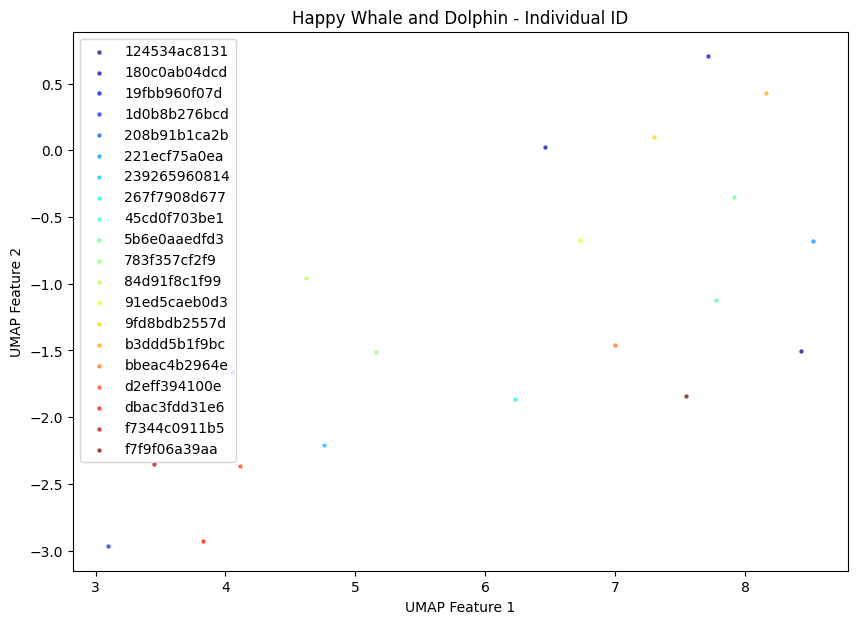

In [59]:
features = train_cls_embeddings1.drop("label", axis=1).values
labels = train_cls_embeddings1["label"].values
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, metric="correlation")
umap_embedding = umap_model.fit_transform(features)
unique_labels = np.unique(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))
color_map = dict(zip(unique_labels, colors))
plt.figure(figsize=(10, 7))
for label in unique_labels:
    indices = labels == label
    plt.scatter(
        umap_embedding[indices, 0],
        umap_embedding[indices, 1],
        color=color_map[label],
        label=le1.inverse_transform([label])[0],
        cmap="Spectral",
        s=5,
        alpha=0.6,
    )
plt.legend()
plt.title("Happy Whale and Dolphin - Individual ID")
plt.xlabel("UMAP Feature 1")
plt.ylabel("UMAP Feature 2")
plt.show()

/storage/scratch1/2/cmarutha3/.venv/lib64/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/tmp/ipykernel_3160735/3545917089.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding[indices, 0], umap_embedding[indices, 1], color=color_map[label], label=le2.inverse_transform([label])[0], cmap='Spectral', s=5, alpha=0.6)
/tmp/ipykernel_3160735/3545917089.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding[indices, 0], umap_embedding[indices, 1], color=color_map[label], label=le2.inverse_transform([label])[0], cmap='Spectral', s=5, alpha=0.6)
/tmp/ipykernel_3160735/3545917089.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding[indices, 0], umap_emb

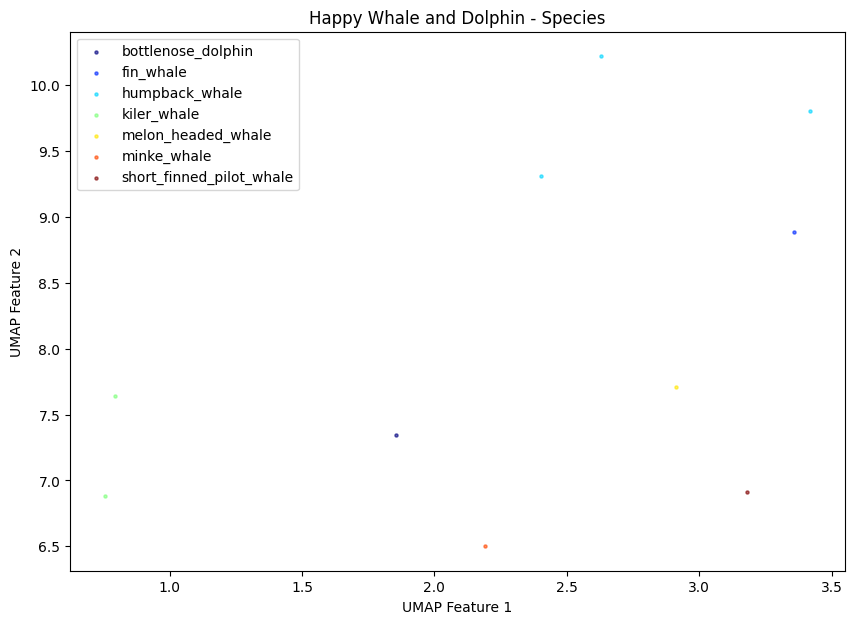

In [60]:
features = train_cls_embeddings2.drop("label", axis=1).values
labels = train_cls_embeddings2["label"].values
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, metric="correlation")
umap_embedding = umap_model.fit_transform(features)
unique_labels = np.unique(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))
color_map = dict(zip(unique_labels, colors))
plt.figure(figsize=(10, 7))
for label in unique_labels:
    indices = labels == label
    plt.scatter(
        umap_embedding[indices, 0],
        umap_embedding[indices, 1],
        color=color_map[label],
        label=le2.inverse_transform([label])[0],
        cmap="Spectral",
        s=5,
        alpha=0.6,
    )
plt.legend()
plt.title("Happy Whale and Dolphin - Species")
plt.xlabel("UMAP Feature 1")
plt.ylabel("UMAP Feature 2")
plt.show()